In [30]:
from pennylane import qaoa
import pennylane as qml
from pennylane import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import dominantset as ds

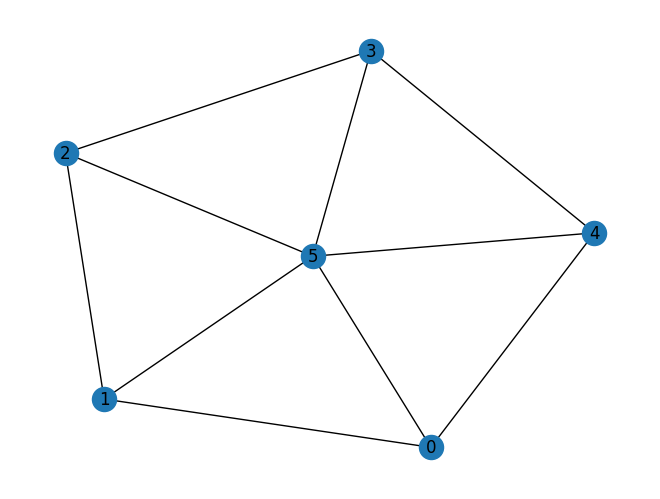

In [31]:
edges = [(0, 1), (1, 2), (2, 3),(3,4),(4,0),(5,0),(5,1),(5,2),(5,3),(5,4)]
graph = nx.Graph(edges)

nx.draw(graph, with_labels=True)
plt.show()

In [33]:
cost_h = ds.cost_ds(graph)
mixer_h = qml.pauli.simplify(ds.mixer_ds(graph))
#print("Cost Hamiltonian", cost_h)
#print("Mixer Hamiltonian", mixer_h)
np.matmul(cost_h,mixer_h)

ValueError: matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [5]:
def qaoa_layer(gamma, alpha):
    qaoa.cost_layer(gamma, cost_h)
    qaoa.mixer_layer(alpha, mixer_h)

In [10]:
wires = range(6)
depth = 2

def circuit(params, **kwargs):
    for w in wires:
        qml.PauliX(wires=w)
    qml.layer(qaoa_layer, depth, params[0], params[1])


In [11]:
dev = qml.device("default.qubit", wires=wires)

@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(cost_h)

In [25]:
optimizer = qml.GradientDescentOptimizer()
steps = 100
params = np.array([[6,6], [6,6]], requires_grad=True)

In [26]:
for i in range(steps):
    params = optimizer.step(cost_function, params)

print("Optimal Parameters")
print(params)

Optimal Parameters
[[ 6.          6.00196089]
 [21.48195845 13.6165453 ]]


In [27]:
@qml.qnode(dev)
def probability_circuit(gamma, alpha):
    circuit([gamma, alpha])
    return qml.probs(wires=wires)


probs = probability_circuit(params[0], params[1])

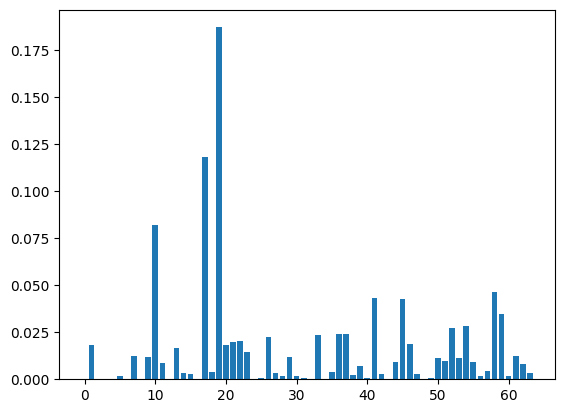

In [28]:

plt.bar(range(2 ** len(wires)), probs)
plt.show()


In [29]:
np.argmax(probs)

19

### Path Graph

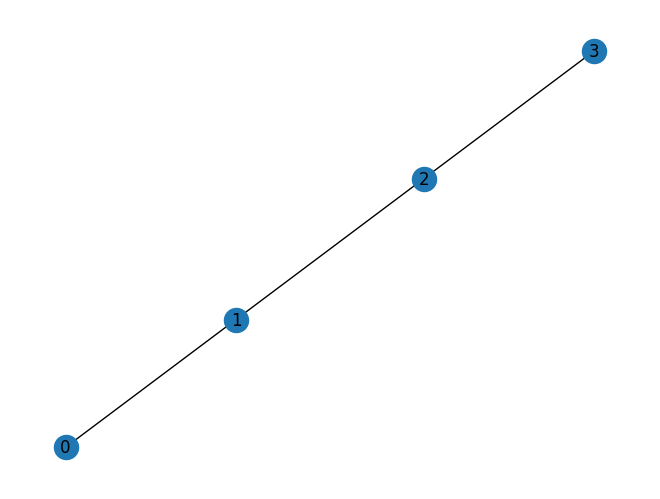

In [11]:
edges = [(0, 1), (1, 2), (2, 3)]
graph = nx.Graph(edges)

nx.draw(graph, with_labels=True)
plt.show()

In [12]:
cost_h = ds.cost_ds(graph)
mixer_h = qml.pauli.simplify(ds.mixer_ds(graph))
print("Cost Hamiltonian", cost_h)
print("Mixer Hamiltonian", mixer_h)

Cost Hamiltonian   (-0.5) [Z0]
+ (-0.5) [Z1]
+ (-0.5) [Z2]
+ (-0.5) [Z3]
+ (0.5) [I0]
+ (0.5) [I1]
+ (0.5) [I2]
+ (0.5) [I3]
Mixer Hamiltonian   (0.5) [X0]
+ (0.5) [X1]
+ (0.5) [X2]
+ (0.5) [X3]
+ (-0.5) [X0 Z1]
+ (-0.5) [Z0 X1]
+ (-0.5) [X2 Z3]
+ (-0.5) [Z2 X3]
+ (-0.375) [X1 Z2]
+ (-0.375) [Z1 X2]
+ (-0.25) [X0 Z2]
+ (-0.25) [X1 Z3]
+ (-0.25) [Z0 X2]
+ (-0.25) [Z1 X3]
+ (0.125) [X1 Z2 Z3]
+ (0.125) [Z0 Z1 X2]
+ (0.25) [X0 Z1 Z2]
+ (0.25) [Z0 X1 Z3]
+ (0.25) [Z0 X2 Z3]
+ (0.25) [Z1 Z2 X3]
+ (0.375) [Z0 X1 Z2]
+ (0.375) [Z1 X2 Z3]
+ (-0.125) [Z0 X1 Z2 Z3]
+ (-0.125) [Z0 Z1 X2 Z3]


In [13]:
def qaoa_layer(gamma, alpha):
    qaoa.cost_layer(gamma, cost_h)
    qaoa.mixer_layer(alpha, mixer_h)

In [14]:
wires = range(4)
depth = 2

def circuit(params, **kwargs):
    for w in wires:
        qml.PauliX(wires=w)
    qml.layer(qaoa_layer, depth, params[0], params[1])


In [15]:
dev = qml.device("default.qubit", wires=wires)

@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(cost_h)

In [24]:
optimizer = qml.GradientDescentOptimizer()
steps = 700
params = np.array([[0.5, 0.5], [0.5,0.5]], requires_grad=True)

In [25]:
for i in range(steps):
    params = optimizer.step(cost_function, params)

print("Optimal Parameters")
print(params)

Optimal Parameters
[[5.00000000e-01 4.24851404e-01]
 [1.04719755e+00 4.36312373e-09]]


In [26]:
@qml.qnode(dev)
def probability_circuit(gamma, alpha):
    circuit([gamma, alpha])
    return qml.probs(wires=wires)


probs = probability_circuit(params[0], params[1])

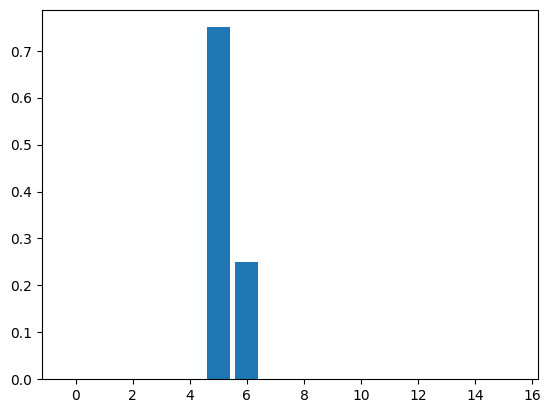

In [27]:

plt.bar(range(2 ** len(wires)), probs)
plt.show()


In [ ]:
def circuit(beta,**kwargs):
    for w in wires:
        qml.PauliX(wires=w)
dev = qml.device("default.qubit", wires=wires)

@qml.qnode(dev)
def cost_function(beta):
    circuit(beta)
    return qml.expval(cost_h)
